## Heading

In [1]:
import numpy as np
import pandas as pd

# from scipy.stats import chi2_contingency
from scipy.stats import zscore

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/properties.csv")
pd.set_option("display.max_columns", None)  # Displays all the columns

In [3]:
df.shape

(75511, 30)

In [5]:
df.locality.value_counts()

locality
Brussels             7958
Antwerp              5880
Liège                4632
Brugge               4326
Halle-Vilvoorde      3852
Gent                 3272
Turnhout             3164
Leuven               3154
Nivelles             3088
Oostend              2871
Aalst                2694
Charleroi            2390
Kortrijk             2153
Hasselt              2054
Namur                2043
Mechelen             1727
Sint-Niklaas         1664
Mons                 1631
Veurne               1611
Dendermonde          1380
Verviers             1362
Tournai              1273
Oudenaarde           1252
Soignies             1208
Thuin                 830
Mouscron              777
Dinant                704
Tongeren              697
Maaseik               686
Ath                   623
Huy                   580
Marche-en-Famenne     519
Waremme               493
Neufchâteau           475
Arlon                 455
Diksmuide             426
Virton                394
Bastogne              392
Phi

In [4]:
# print(df.dtypes)

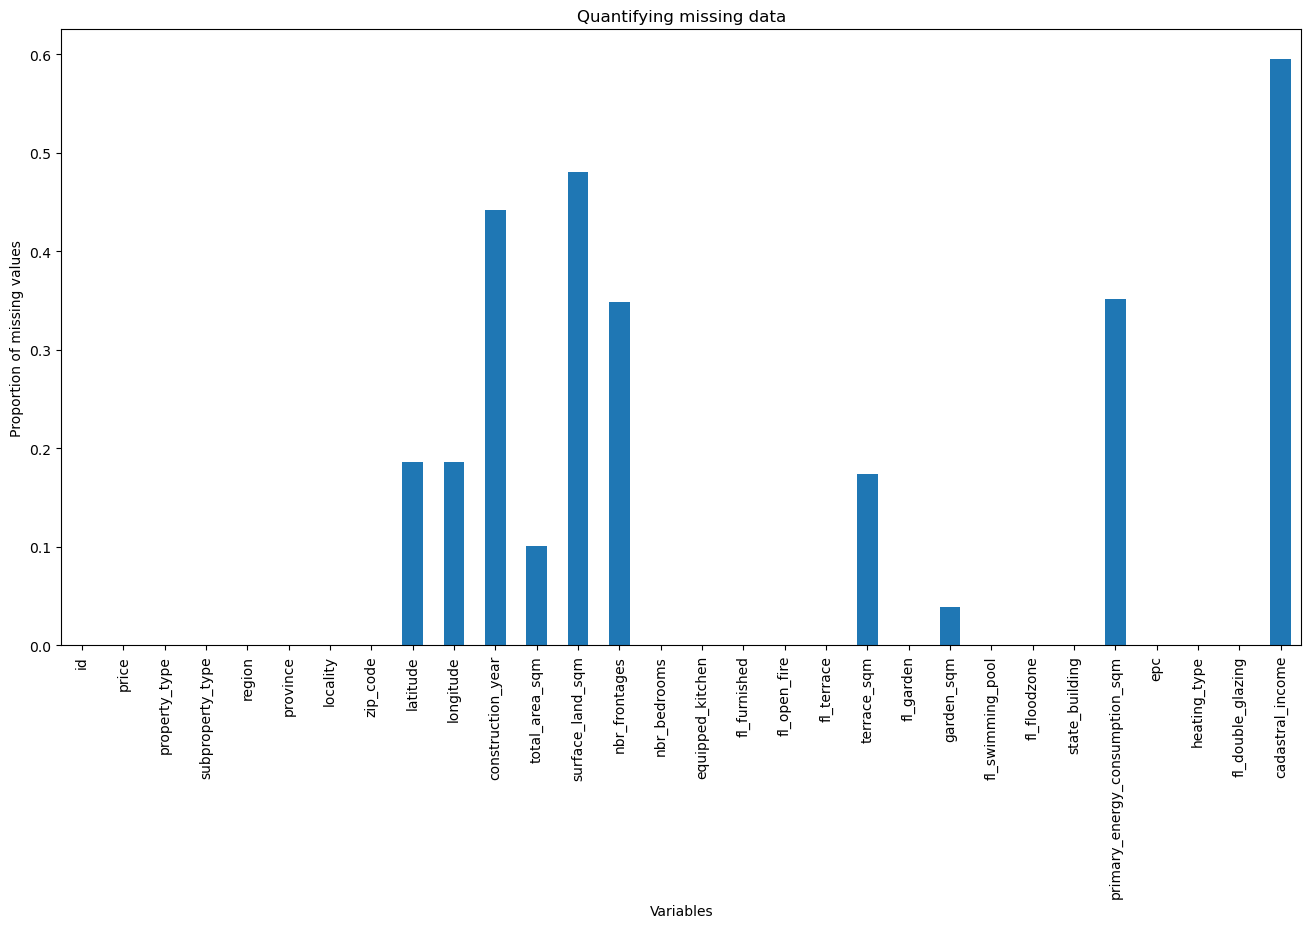

In [5]:
missing_proportion = df.isnull().mean()

# Condition
#missing_proportion = missing_proportion[missing_proportion > 0.9] # Only plot features with more than 90% values missing

missing_proportion.plot.bar(figsize=(16,8))

plt.ylabel('Proportion of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

plt.show()

In [32]:
missing_proportion_cat = df.select_dtypes(include=["object"])

for column in missing_proportion_cat.columns:
    x = missing_proportion_cat[column].value_counts(normalize=True)
    print(missing_proportion_cat[column].value_counts(normalize=True))
    
# Condition
#missing_proportion = missing_proportion[missing_proportion > 0.9] # Only plot features with more than 90% values missing

#missing_proportion.plot.bar(figsize=(16,8))

#plt.ylabel('Proportion of missing values')
#plt.xlabel('Variables')
#plt.title('Quantifying missing data')

#plt.show()

property_type
HOUSE        0.517642
APARTMENT    0.482358
Name: proportion, dtype: float64
subproperty_type
HOUSE                   0.400063
APARTMENT               0.383544
VILLA                   0.041080
GROUND_FLOOR            0.029214
APARTMENT_BLOCK         0.024398
MIXED_USE_BUILDING      0.020560
PENTHOUSE               0.019676
DUPLEX                  0.019431
FLAT_STUDIO             0.015390
EXCEPTIONAL_PROPERTY    0.006504
TOWN_HOUSE              0.006286
SERVICE_FLAT            0.006232
MANSION                 0.005620
BUNGALOW                0.004177
KOT                     0.003892
LOFT                    0.003579
COUNTRY_COTTAGE         0.002667
FARMHOUSE               0.002259
MANOR_HOUSE             0.001864
TRIPLEX                 0.001402
CHALET                  0.001129
OTHER_PROPERTY          0.001034
Name: proportion, dtype: float64
region
Flanders            0.575758
Wallonia            0.321264
Brussels-Capital    0.102938
MISSING             0.000041
Name: prop

In [6]:
# Fills in missing latitude and longitude with the mean of the locality

for locality in df.locality.unique():
    mean_lat = round(df[df["locality"] == locality].latitude.mean(), 6)
    mean_long = round(df[df["locality"] == locality].longitude.mean(), 6)

    # print(f'{locality}\n  mean latitude: {mean_lat}\n  mean longitude: {mean_long}')

    cond = df["locality"] == locality  # Condition
    df.loc[cond, "latitude"] = df.loc[cond, "latitude"].fillna(mean_lat)
    df.loc[cond, "longitude"] = df.loc[cond, "longitude"].fillna(mean_long)

In [7]:
df.region.value_counts()

region
Flanders            43424
Wallonia            24126
Brussels-Capital     7958
MISSING                 3
Name: count, dtype: int64

In [57]:
df.columns

Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income', 'equipped_kitchen_short',
       'epc_flanders', 'epc_wallonia', 'epc_brussels'],
      dtype='object')

In [8]:
df.columns

Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income'],
      dtype='object')

In [9]:
df.property_type.value_counts()

property_type
HOUSE        39255
APARTMENT    36256
Name: count, dtype: int64

In [10]:
df = df.drop(df[df["subproperty_type"] == "CASTLE"].index)
df = df.drop(df[(df["epc"] == "A++" & df["region"] == "Brussels-Capital").index)

In [66]:
print(df.shape)
df = df.drop(df[(df["epc"] == "A++") & (df["region"] == "Brussels-Capital")].index)
print(df.shape)

(73491, 34)
(73490, 34)


In [11]:
df_house = df[df["property_type"] == "HOUSE"]
df_apartment = df[df["property_type"] == "APARTMENT"]

In [12]:
print(df_house.subproperty_type.value_counts())
print(df_apartment.subproperty_type.value_counts())

subproperty_type
HOUSE                   29730
VILLA                    3276
APARTMENT_BLOCK          2043
MIXED_USE_BUILDING       1577
EXCEPTIONAL_PROPERTY      599
TOWN_HOUSE                463
MANSION                   453
BUNGALOW                  308
FARMHOUSE                 218
COUNTRY_COTTAGE           213
MANOR_HOUSE               158
OTHER_PROPERTY             85
CHALET                     83
Name: count, dtype: int64
subproperty_type
APARTMENT       28760
GROUND_FLOOR     2169
PENTHOUSE        1564
DUPLEX           1497
FLAT_STUDIO      1135
SERVICE_FLAT      459
KOT               293
LOFT              270
TRIPLEX           109
Name: count, dtype: int64


In [60]:
df[df['region']=='Brussels-Capital']["epc"].value_counts()


epc
MISSING    1805
G          1293
D          1027
E           960
C           759
F           678
B           555
A           476
A+           11
A++           1
Name: count, dtype: int64

## Outliers

In [13]:
print(df.shape)
#print(df.head())

for column in df.select_dtypes(include=["float64"]).columns:
    z_house = np.abs(zscore(df.loc[df["property_type"] == "HOUSE", column]))
    z_apartment = np.abs(zscore(df.loc[df["property_type"] == "APARTMENT", column]))

    
    # Identify outliers with a z-score greater than 3
    threshold = 3
    z = pd.concat([z_house, z_apartment]).sort_index()
    outliers = df[z > threshold]

    # Print the outliers
    print(f"{column}: {len(outliers)}")
    df = df.drop(outliers.index)


print(df.shape)
#print(df.head())

(75462, 30)
price: 1205
latitude: 0
longitude: 0
construction_year: 0
total_area_sqm: 0
surface_land_sqm: 181
nbr_frontages: 0
nbr_bedrooms: 585
terrace_sqm: 0
garden_sqm: 0
primary_energy_consumption_sqm: 0
cadastral_income: 0
(73491, 30)


In [14]:
df_cat = df.select_dtypes(include=["object"]).columns
df_cat

Index(['property_type', 'subproperty_type', 'region', 'province', 'locality',
       'equipped_kitchen', 'state_building', 'epc', 'heating_type'],
      dtype='object')

In [15]:
df.equipped_kitchen.value_counts()

equipped_kitchen
MISSING               32170
INSTALLED             19038
HYPER_EQUIPPED         8679
SEMI_EQUIPPED          5019
USA_HYPER_EQUIPPED     3839
NOT_INSTALLED          2626
USA_INSTALLED          1627
USA_SEMI_EQUIPPED       403
USA_UNINSTALLED          90
Name: count, dtype: int64

In [16]:
# Create a dictionary to map equipped_kitchen to fewer categories. 
print(df.columns)
kitchen_map = {
    'HYPER_EQUIPPED': 'INSTALLED',
    'SEMI_EQUIPPED': 'INSTALLED',
    'USA_HYPER_EQUIPPED': 'INSTALLED',
    'USA_INSTALLED': 'INSTALLED',
    'USA_SEMI_EQUIPPED': 'INSTALLED',
    'USA_UNINSTALLED': 'NOT_INSTALLED',
}

df["equipped_kitchen_short"] = df["equipped_kitchen"].map(kitchen_map)

print(df.columns)

Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income'],
      dtype='object')
Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_cons

In [70]:
#df[(df["equipped_kitchen_short"] == "NOT_INSTALLED" & df["region"] == "Brussels-Capital")]
df.equipped_kitchen.value_counts()

equipped_kitchen
MISSING               32169
INSTALLED             19038
HYPER_EQUIPPED         8679
SEMI_EQUIPPED          5019
USA_HYPER_EQUIPPED     3839
NOT_INSTALLED          2626
USA_INSTALLED          1627
USA_SEMI_EQUIPPED       403
USA_UNINSTALLED          90
Name: count, dtype: int64

In [73]:
type(df[df["property_type"] == "HOUSE"].index.tolist())

list

In [53]:
df['epc_flanders'] = df[df['region'] == "Flanders"]["epc"]
df['epc_wallonia'] = df[df['region'] == "Wallonia"]["epc"]
df['epc_brussels'] = df[df['region'] == "Brussels-Capital"]["epc"]

epc_flanders_map ={
    'A++' : 8,
    'A+' : 8,
    'A' : 7,
    'B' : 6,
    'C': 5,
    'D' : 4,
    'E' : 3,
    'F' : 2,
    'G' : 1
}
epc_wallonia_map ={
    'A++' : 9,
    'A+' : 8,
    'A' : 7,
    'B' : 6,
    'C': 5,
    'D' : 4,
    'E' : 3,
    'F' : 2,
    'G' : 1
}
epc_brussels_map ={
    'A++' : 9,
    'A+' : 8,
    'A' : 7,
    'B' : 6,
    'C': 5,
    'D' : 4,
    'E' : 3,
    'F' : 2,
    'G' : 1
}

print(df[df["region"] == "Brussels-Capital"]["epc"].value_counts())
print(df["epc_wallonia"].value_counts())

epc
MISSING    1805
G          1293
D          1027
E           960
C           759
F           678
B           555
A           476
A+           11
A++           1
Name: count, dtype: int64
epc_wallonia
MISSING    5289
B          3022
D          2931
C          2707
E          2463
A          2453
G          2146
F          1823
A+          605
A++         171
Name: count, dtype: int64


In [49]:
df_check = df[["epc", "epc_flanders"]]
#df_check["epc_flanders"] = df_check["epc_flanders"].map(epc_flanders_map)
df_check["epc_flanders"].fillna(value='None', inplace=True)
print(df_check["epc_flanders"].value_counts())
print(df_check.head())

epc_flanders
None       31178
MISSING    16458
B           6488
C           5196
A           4384
F           3941
D           3352
E           1865
A++          421
A+           198
G             10
Name: count, dtype: int64
       epc epc_flanders
0        C            C
1        C            C
2  MISSING         None
3        A            A
4       A+         None


C:\Users\Jean\AppData\Local\Temp\ipykernel_21500\1396669558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check["epc_flanders"].fillna(value='None', inplace=True)


In [96]:
list1 = [0 for i in range(5)] 
list2 = [1 for i in range(5)]
list3 = [3 for i in range(10)]
arr1 = np.array(list1)
arr2 = np.array(list2)
list_arrays = [arr1, arr2]
arr = np.append(list_arrays[0], list_arrays[1])
print(type(arr), arr)

check = pd.DataFrame(arr, columns=['predictions'])
print(check.columns)
check["indices"] = list3
#check = check.reset_index()
print(check[check['predictions'] == 1].index)

<class 'numpy.ndarray'> [0 0 0 0 0 1 1 1 1 1]
Index(['predictions'], dtype='object')
Index([5, 6, 7, 8, 9], dtype='int64')


In [76]:
data = [['tom', 10], ['nick', 15], ['juli', 14]]
 
# Create the pandas DataFrame
check = pd.DataFrame(data, columns=['Name', 'Age'])
list = ["hi", "two", "bell"]
check["list"] = list

In [77]:
check

,Name,Age,list
0,tom,10,hi
1,nick,15,two
2,juli,14,bell


Text(0.5, 1.0, 'Correlation Heatmap')

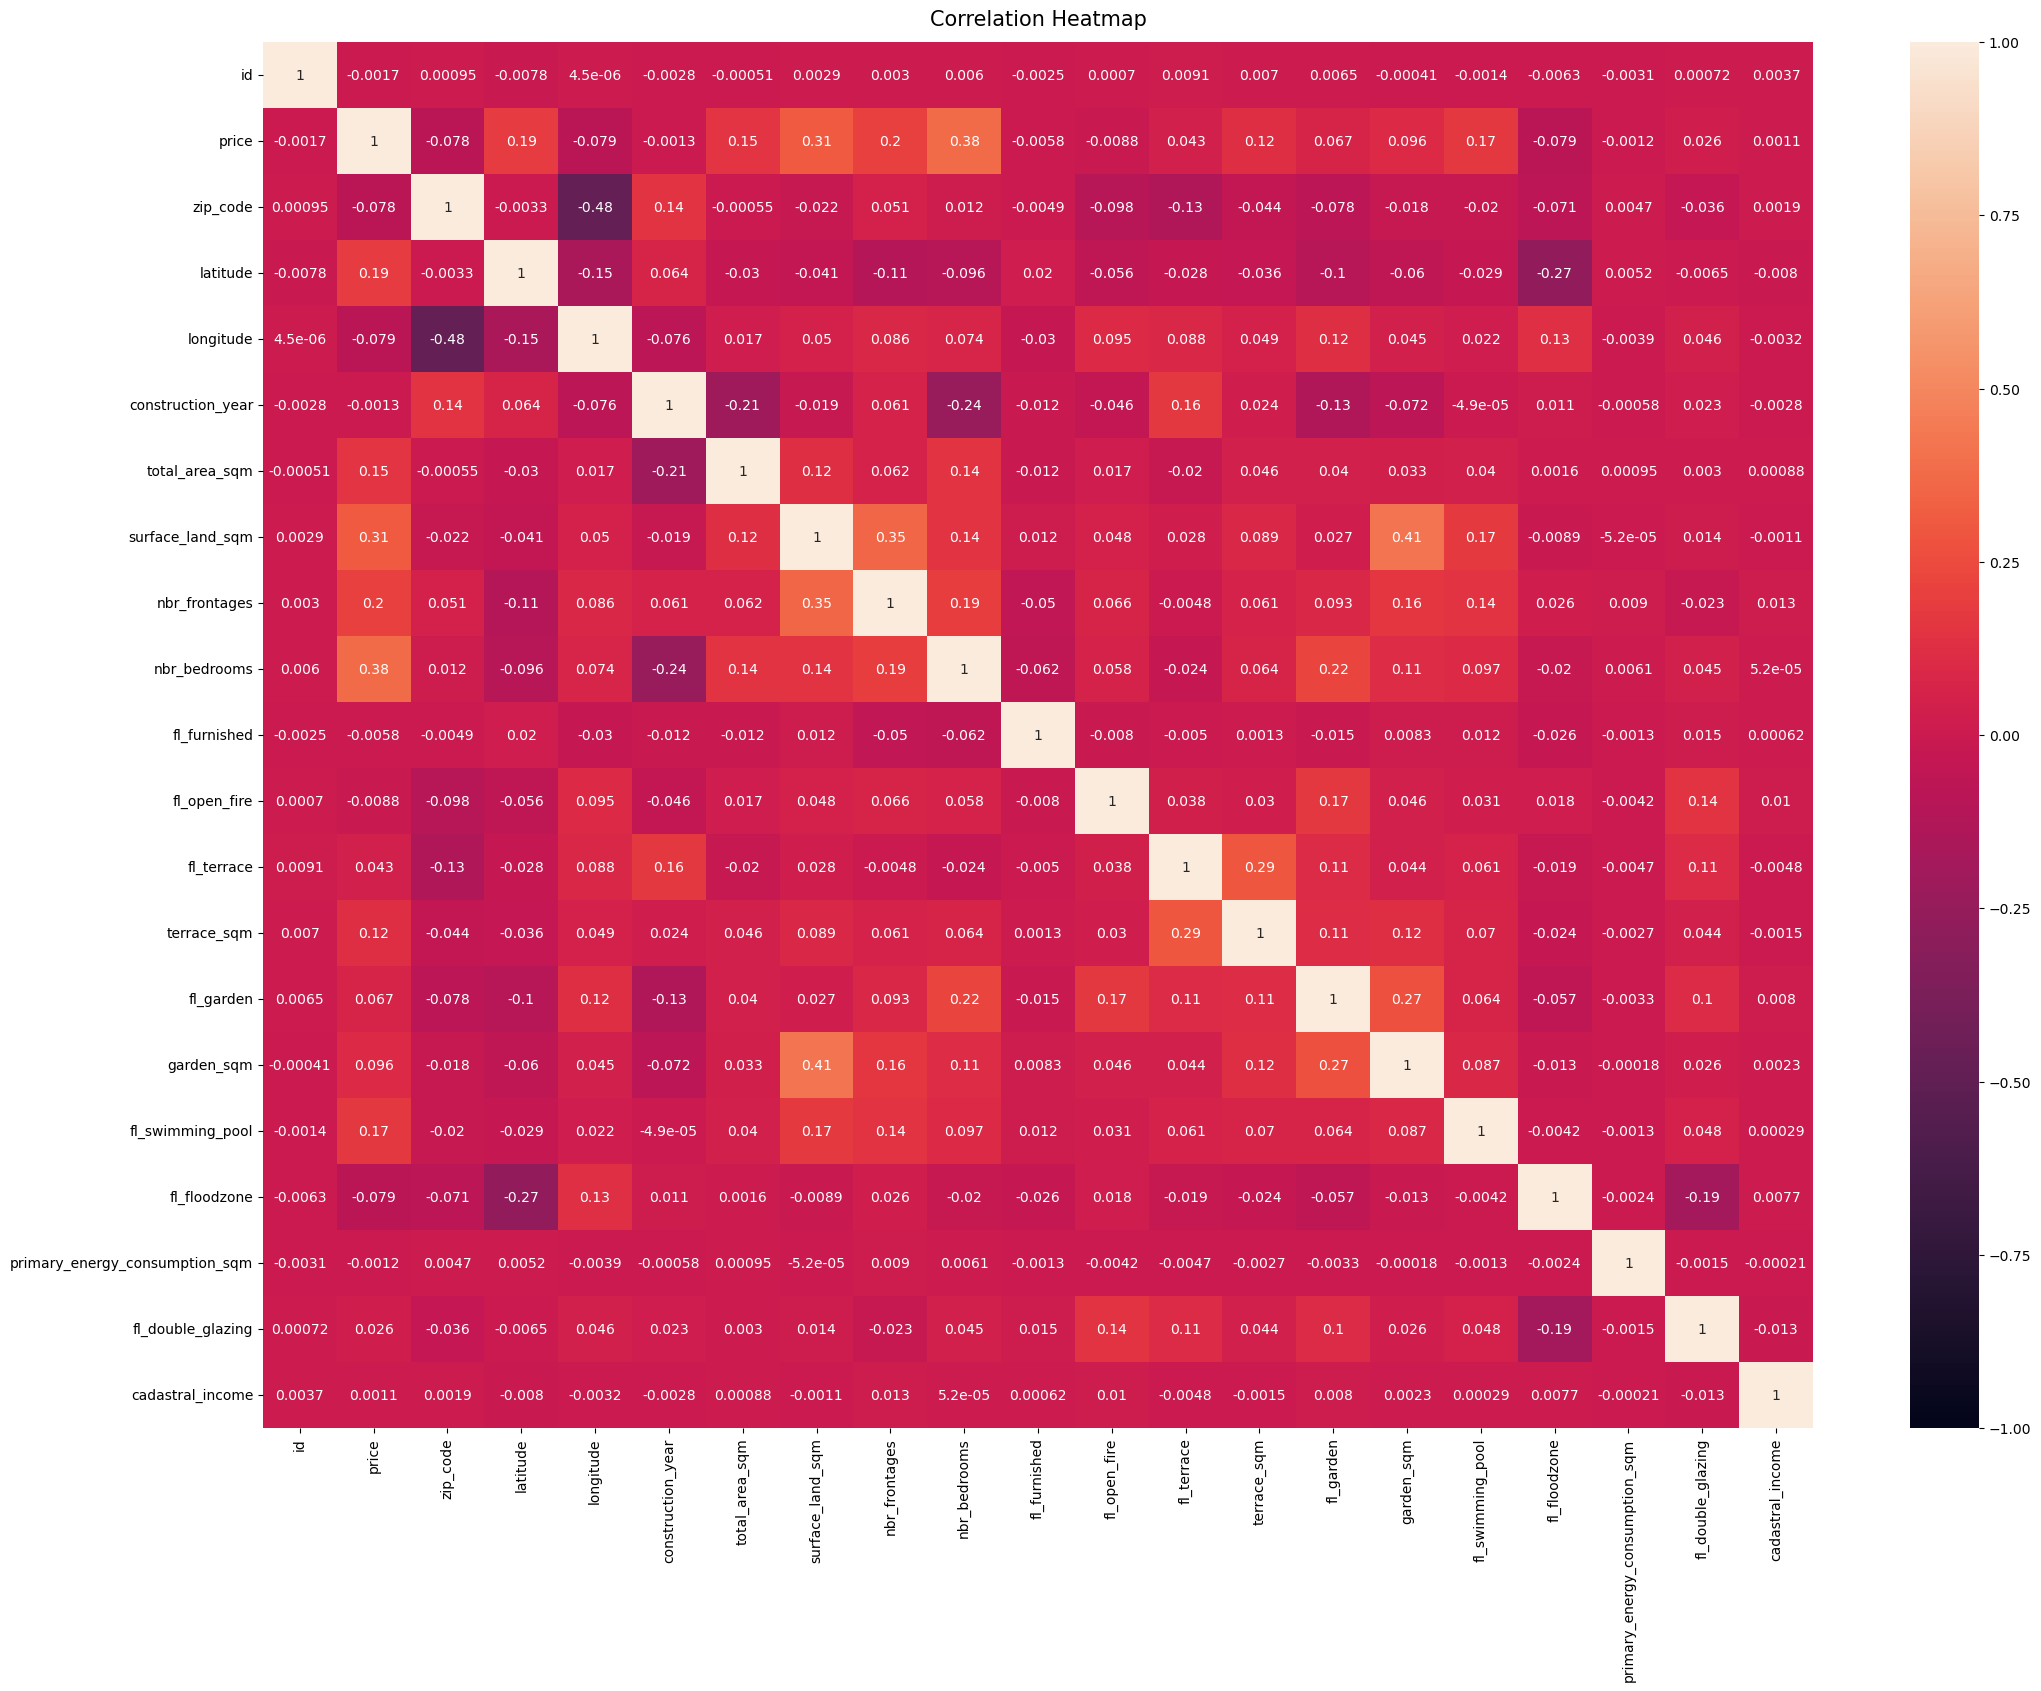

In [18]:
plt.figure(figsize=(25, 18))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.

heatmap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 15}, pad=12)

['Flanders', 'Brussels-Capital', 'Wallonia', 'MISSING']


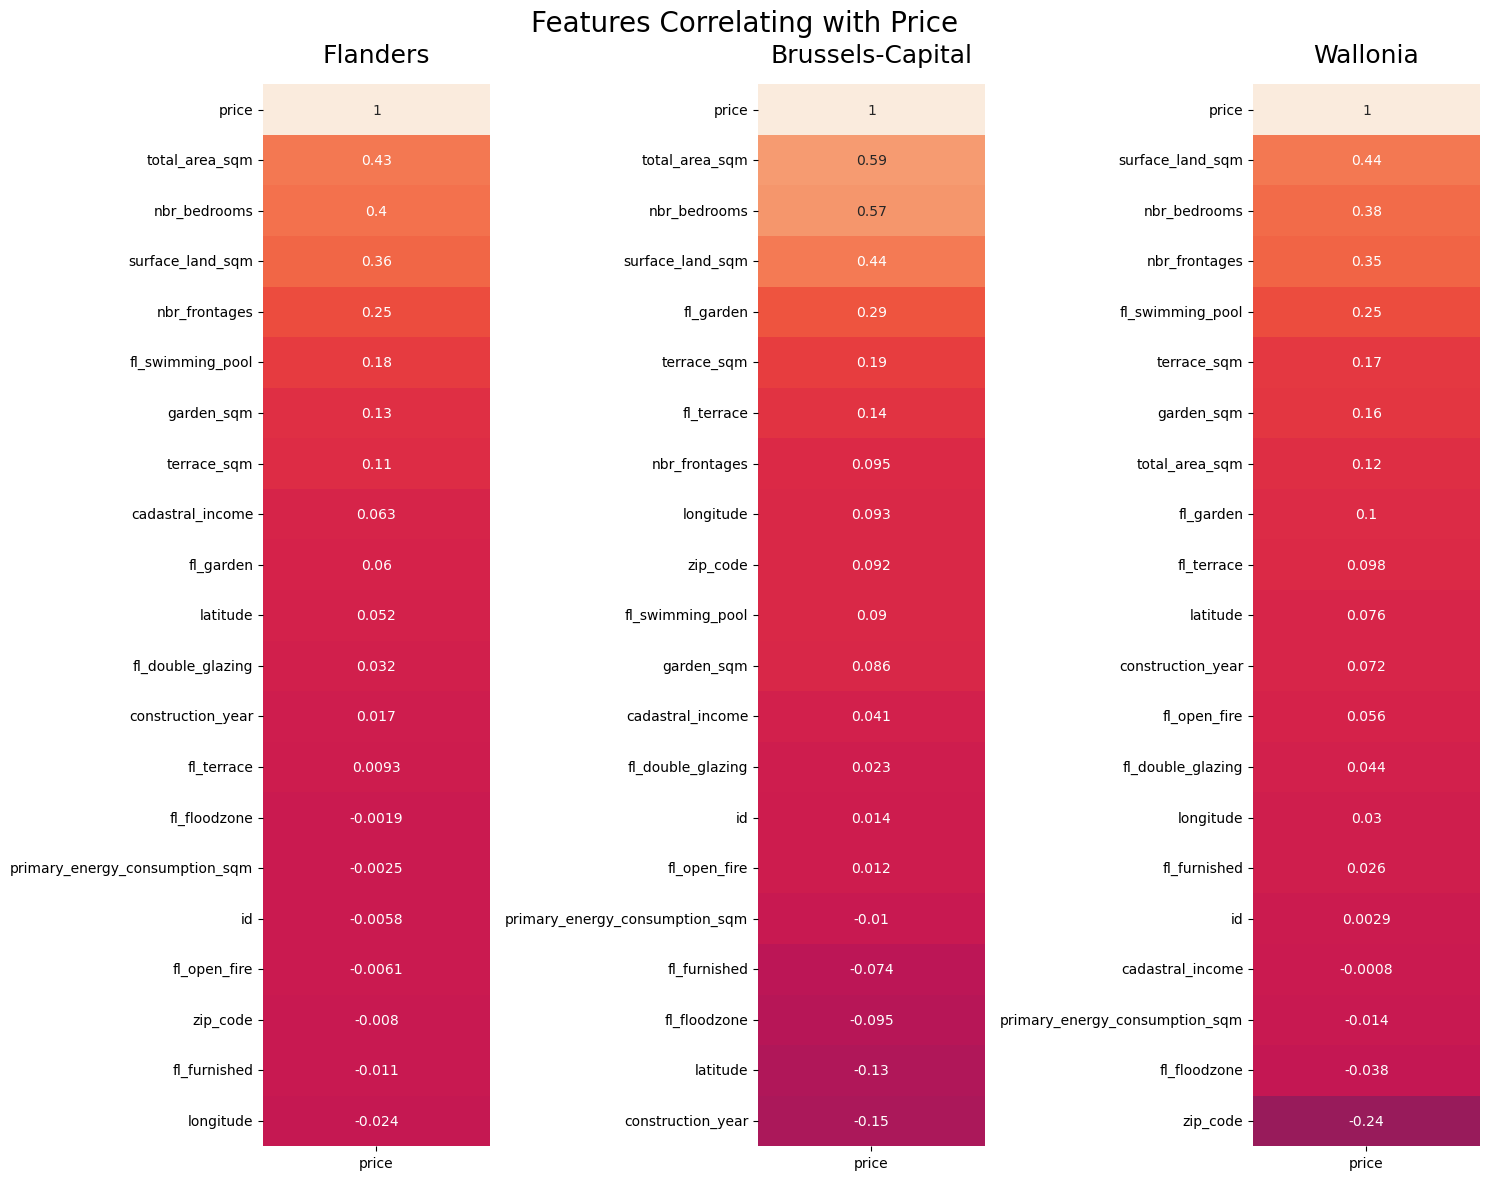

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 12))

fig.suptitle("Features Correlating with Price", fontsize=20)

# sns.boxplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')

municipality = df.region.unique().tolist()
print(municipality)
municipality = [i for i in municipality[:3] if i is not None]

for i in range(len(municipality)):
    immo_region = df[df["region"] == municipality[i]]
    heatmap = sns.heatmap(
        immo_region.corr(numeric_only=True)[["price"]].sort_values(
            by="price", ascending=False
        ),
        ax=axes[i],
        vmin=-1,
        vmax=1,
        annot=True,
        cbar=False,
    )
    heatmap.set_title(f"{municipality[i]}", fontdict={"fontsize": 18}, pad=16)

fig.tight_layout()

In [20]:
CrosstabResult = pd.crosstab(index=df["equipped_kitchen"], columns=df["state_building"])
CrosstabResult

# ChiSqResult = chi2_contingency(CrosstabResult)
# print(f'P-value of the X2 is: {ChiSqResult}')

state_building,AS_NEW,GOOD,JUST_RENOVATED,MISSING,TO_BE_DONE_UP,TO_RENOVATE,TO_RESTORE
equipped_kitchen,,,,,,,
HYPER_EQUIPPED,3254,2581,369,2299,125,50,1
INSTALLED,3392,6184,898,6729,1123,702,10
MISSING,4029,9279,572,14126,1528,2414,222
NOT_INSTALLED,380,296,30,879,259,738,44
SEMI_EQUIPPED,159,1782,163,835,962,1086,32
USA_HYPER_EQUIPPED,2315,443,220,798,44,14,5
USA_INSTALLED,485,468,120,397,98,55,4
USA_SEMI_EQUIPPED,104,114,22,47,59,57,0
USA_UNINSTALLED,11,5,1,69,2,2,0


In [21]:
print(df["province"].value_counts())
print(df["locality"].value_counts())
print(df[df["province"] == "MISSING"])

province
West Flanders      11169
Antwerp            10553
East Flanders      10283
Hainaut             8571
Brussels            7565
Liège               6929
Flemish Brabant     6911
Limburg             3397
Walloon Brabant     3005
Namur               2935
Luxembourg          2170
MISSING                3
Name: count, dtype: int64
locality
Brussels             7565
Antwerp              5745
Liège                4563
Halle-Vilvoorde      3791
Brugge               3764
Gent                 3211
Leuven               3120
Turnhout             3112
Nivelles             3005
Oostend              2839
Aalst                2676
Charleroi            2340
Kortrijk             2132
Hasselt              2029
Namur                2011
Mechelen             1696
Sint-Niklaas         1645
Veurne               1601
Mons                 1593
Dendermonde          1369
Verviers             1308
Tournai              1256
Oudenaarde           1232
Soignies             1188
Thuin                 817
Mouscr

#df[df["latitude"].isnull()].locality.unique()

In [22]:
df.locality.unique()

array(['Antwerp', 'Gent', 'Brussels', 'Turnhout', 'Nivelles',
       'Halle-Vilvoorde', 'Liège', 'Sint-Niklaas', 'Veurne', 'Verviers',
       'Mechelen', 'Charleroi', 'Dendermonde', 'Bastogne', 'Leuven',
       'Hasselt', 'Mons', 'Aalst', 'Brugge', 'Tournai', 'Oostend',
       'Oudenaarde', 'Philippeville', 'Kortrijk', 'Dinant', 'Ieper',
       'Huy', 'Marche-en-Famenne', 'Namur', 'Maaseik', 'Mouscron',
       'Diksmuide', 'Soignies', 'Neufchâteau', 'Arlon', 'Tongeren',
       'Waremme', 'Thuin', 'Virton', 'Ath', 'Roeselare', 'Tielt', 'Eeklo',
       'MISSING'], dtype=object)

In [23]:
df_Ieper = df_check[df_check["locality"] == "Roeselare"]
df_Ieper.tail()

NameError: name 'df_check' is not defined

In [ ]:
df_Ieper.latitude.isnull().value_counts()

In [ ]:
mean_lat = round(df_Ieper.latitude.mean(), 6)

In [ ]:
# df_Ieper["latitude"] = np.where(mean_lat, df_Ieper["latitude"], df_Ieper["latitude"])
# df_Ieper.loc[df_Ieper["latitude"].isnull() == True] = mean_lat
# df_Ieper.latitude.fillna(mean_lat)
df_Ieper[["latitude"]] = df_Ieper[["latitude"]].fillna(mean_lat)

df_Ieper.head()

In [ ]:
df_Ieper.latitude.isnull().value_counts()

In [ ]:
df_Ieper[df_Ieper["latitude"] == mean_lat]

In [ ]:
df_Ieper.head()